![](https://i.pinimg.com/originals/4a/22/04/4a2204ad07714695f6f523d7840afbe9.jpg)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from collections import Counter
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
from pandas.tools.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('size of train data',train.shape)
print('size of test data',test.shape)

size of train data (15120, 56)
size of test data (565892, 55)


In [4]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



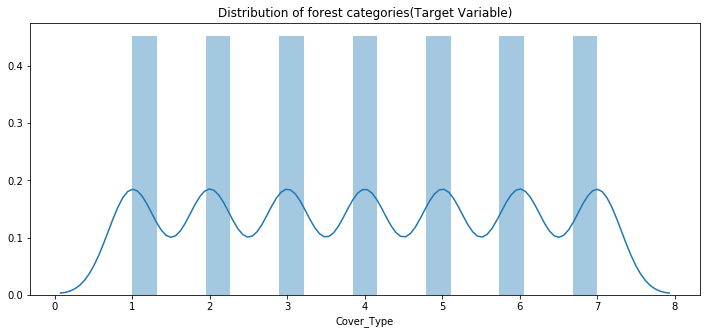

In [6]:
plt.figure(figsize=(12,5))
plt.title("Distribution of forest categories(Target Variable)")
ax = sns.distplot(train["Cover_Type"])

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



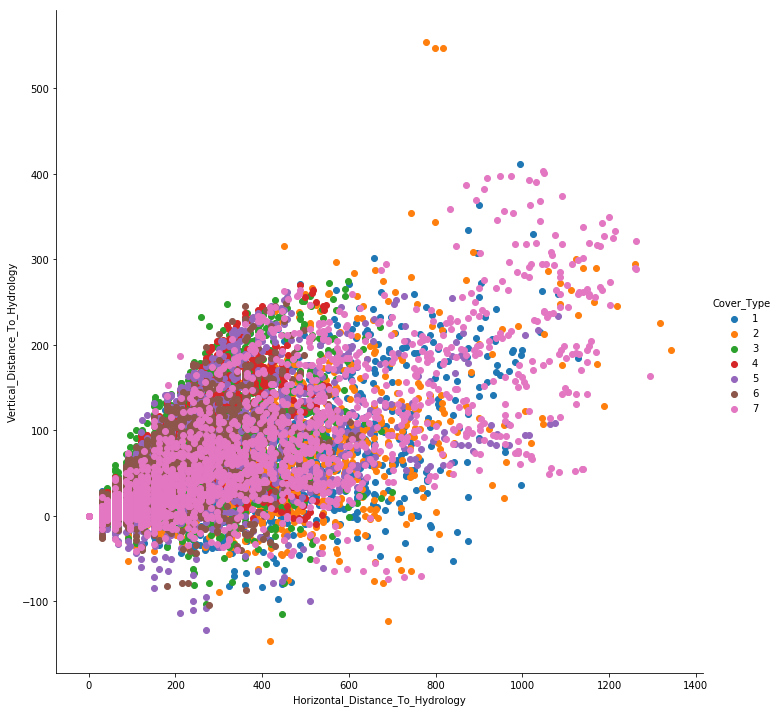

In [7]:
sns.FacetGrid(train, hue="Cover_Type", size=10).map(plt.scatter, "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology").add_legend()

## Parallel plots

A hillshade is a grayscale 3D representation of the surface, with the sun's relative position taken into account for shading the image. This function uses the altitude and azimuth properties to specify the sun's position.

* **Hillshade_9am (0 to 255 index)** - Hillshade index at 9am, summer solstice
* **Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice
* **Hillshade_3pm (0 to 255 index) **- Hillshade index at 3pm, summer solstice

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.



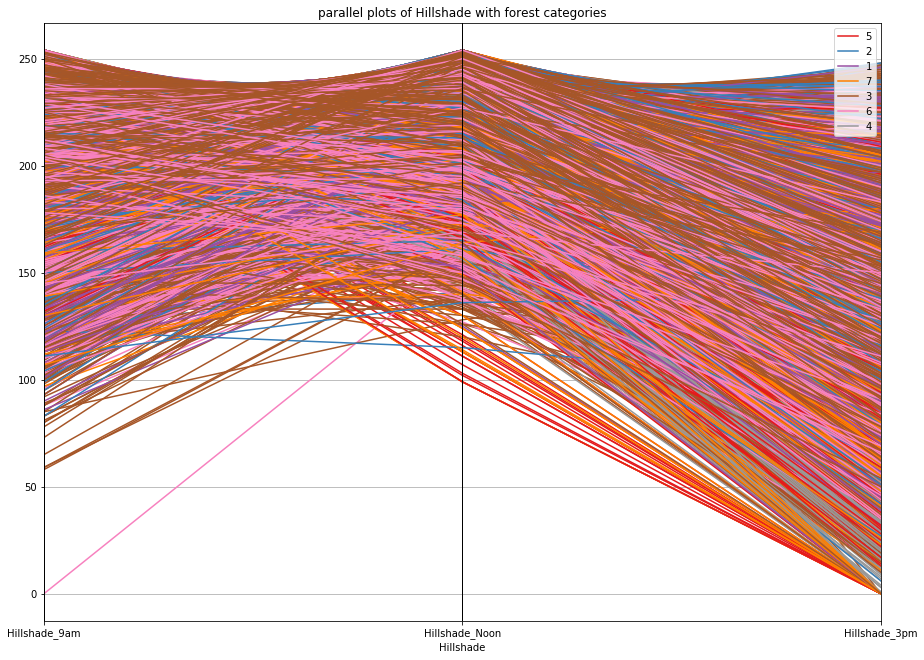

In [8]:
temp = train[['Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Cover_Type']]
plt.figure(figsize=(15,11))
parallel_coordinates(temp,'Cover_Type', colormap=plt.get_cmap("Set1"))
plt.title("parallel plots of Hillshade with forest categories")
plt.xlabel("Hillshade")
plt.show()

## Principal component analysis (PCA)

Color represent target variable(Cover_type)

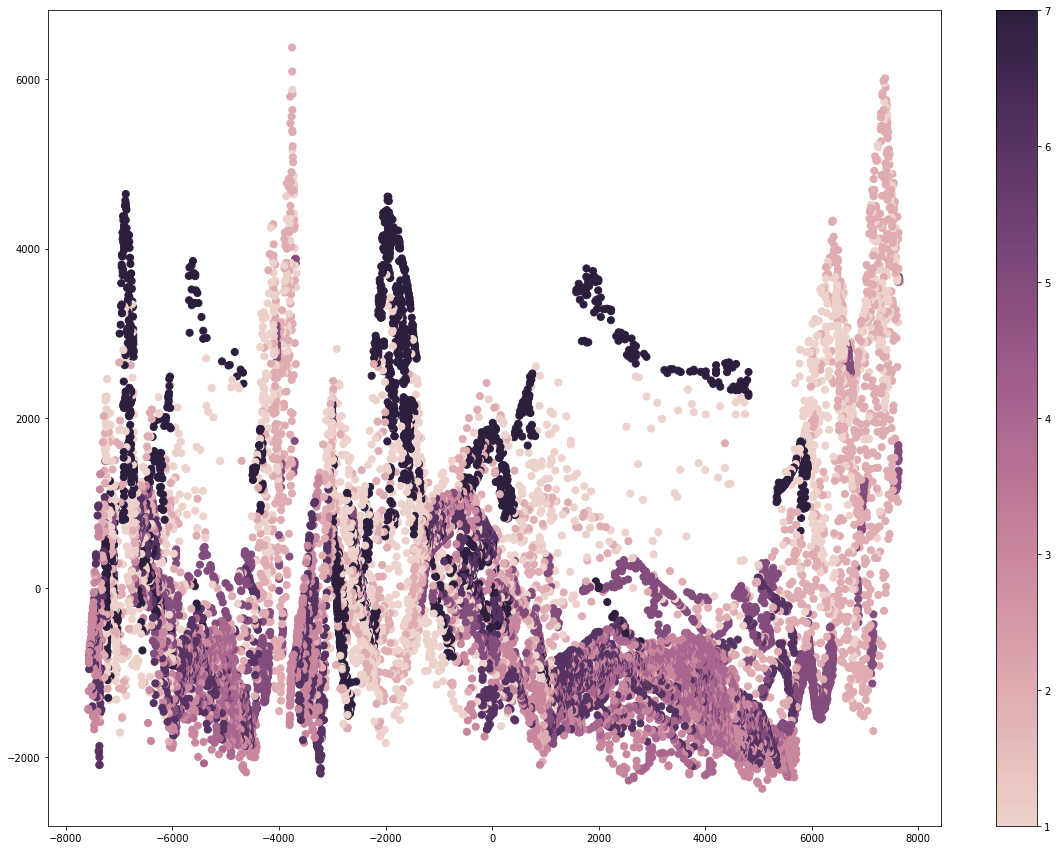

In [9]:
pca = PCA(n_components=3) # for simplicity i choose 3
pca_results = pca.fit_transform(train.drop(["Cover_Type"], axis=1))
cmap = sns.cubehelix_palette(as_cmap=True)
tp, ax = plt.subplots(figsize=(20,15))
temp = ax.scatter(pca_results[:,0], pca_results[:,1], c=train.Cover_Type, s=50, cmap=cmap)
tp.colorbar(temp)
plt.show()

# Feature Engineering

* **Features engeneering** :
    * **Linear combination** :
           * Elevation, Vertical dist. to Hydrology
           * Horizontal dist. to Hydrology, Horizontal dist. to Fire Points 
           * Horizontal dist. to Hydrology, Horizontal dist. to Roadways 
           * Horizontal dist. to Fire Points, Horizontal dist. to Roadways 
    * **Euclidean distance** : 
            * Horizontal dist. to Hydrology, Vertical dist. to Hydrology
            * euclidean distance = \sqrt{(verticaldistance)^2 + (horizontaldistance)^2}\] 
    * **Distance to Amenities** :
         * As we know distances to amenities like Water, Fire and Roadways played a key role in determining cover type 
           * Mean distance to Amenities 
           * Mean Distance to Fire and Water 

In [10]:
####################### Train data #############################################
train['HF1'] = train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points']
train['HF2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
train['HR1'] = abs(train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['HR2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
train['FR1'] = abs(train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['FR2'] = abs(train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])
train['ele_vert'] = train.Elevation-train.Vertical_Distance_To_Hydrology

train['slope_hyd'] = (train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)**0.5
train.slope_hyd=train.slope_hyd.map(lambda x: 0 if np.isinf(x) else x) # remove infinite value if any

#Mean distance to Amenities 
train['Mean_Amenities']=(train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology + train.Horizontal_Distance_To_Roadways) / 3 
#Mean Distance to Fire and Water 
train['Mean_Fire_Hyd']=(train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology) / 2 

####################### Test data #############################################
test['HF1'] = test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points']
test['HF2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])
test['HR1'] = abs(test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['HR2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])
test['FR1'] = abs(test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
test['FR2'] = abs(test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])
test['ele_vert'] = test.Elevation-test.Vertical_Distance_To_Hydrology

test['slope_hyd'] = (test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)**0.5
test.slope_hyd=test.slope_hyd.map(lambda x: 0 if np.isinf(x) else x) # remove infinite value if any

#Mean distance to Amenities 
test['Mean_Amenities']=(test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology + test.Horizontal_Distance_To_Roadways) / 3 
#Mean Distance to Fire and Water 
test['Mean_Fire_Hyd']=(test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology) / 2

# Model Building

In [11]:
feature = [col for col in train.columns if col not in ['Cover_Type','Id']]
X_train = train[feature]
X_test = test[feature]
etc = ensemble.ExtraTreesClassifier(n_estimators=350)  
etc.fit(X_train, train['Cover_Type'])
sub = pd.DataFrame({"Id": test['Id'],"Cover_Type": etc.predict(X_test)})
sub.to_csv("etc.csv", index=False) 

**To Do :**
  * More plots
  * Feature Importance
  * LB score improvement

## More To Come Stayed Tuned !!